# Computação Simbólica com _sympy_ - Parte 2

## Operadores lógicos

Vamos estudar: 

- *operadores de comparação*

- *operadores de pertencimento* 

- *operadores de identidade*

### Operadores de comparação

| operador | significado | símbolo matemático | 
|---|---|---| 
| `<` | menor do que | $<$ |
| `<=` | menor ou igual a | $\leq$ |
| `>` | maior do que | $>$ |
| `>=` | maior ou igual a | $\geq$ |
| `==` | igual a | $=$ |
| `!=` | diferente de | $\neq$ |

**Nota:** `==`: igualdade; `=`: atribuição

In [1]:
2 < 3 # o resultado é um 'bool'

True

In [2]:
5 < 2 # isto é falso

False

In [3]:
2 <= 2 # isto é verdadeiro

True

In [4]:
4 >= 3 # isto é verdadeiro

True

In [5]:
6 != -2 

True

In [6]:
4 == 4 # isto não é uma atribuição! 

True

Podemos realizar comparações aninhadas:

In [7]:
x = 2
1 < x < 3

True

In [8]:
3 > x > 4

False

In [9]:
2 == x > 3 

False

As comparações aninhadas acima são resolvidas da esquerda para a direita e em partes. Isso nos leva a introduzir os seguintes operadores.

| operador | símbolo matemático | significado | uso relacionado a |
|---|---|---|---|
| `or` | $\vee$ | "ou" booleano | união, disjunção |
| `and` | $\wedge$ | "e" booleano | interseção, conjunção |
| `not` | $\neg$ | "não" booleano | exclusão, negação |

## Operadores booleanos e conjuntos

Explicação por meio de diagramas de Venn

<!-- Figura -->
<table>
<center>
<td>
    <img src='../figs/02/venn-1.png' height=800px width=800px> </img>
</td>
<td>
    <img src='../figs/02/venn-2.png' height=800px width=800px> </img>
</td>    
<td>
    <img src='../figs/02/venn-3.png' height=800px width=800px> </img>
</td>    
</center>

In [10]:
# parênteses não são necessários aqui
(2 == x) and (x > 3) # 1a. comparação: 'True'; 2a.: 'False'. Portanto, ambas: 'False'

False

In [11]:
# parênteses não são necessários aqui
(x < 1) or (x < 2) # nenhuma das duas é True. Portanto, 

False

In [12]:
not (x == 2) # nega o "valor-verdade" que é 'True'

False

In [13]:
not x + 1 > 3 # estude a precedência deste exemplo. Por que é 'True'?

True

In [14]:
not (x + 1 > 3) # estude a precedência deste exemplo. Por que também é 'True'?

True

### Operadores de pertencimento

A tabela abaixo resume os operadores de pertencimento. 

| operador | significado | símbolo matemático
|---|---|---|
| `in` | pertence a | $\in$ |
| `not in` | não pertence a | $\notin$ |

Eles terão mais utilidade quando falarmos sobre sequências, listas. Neste momento, vejamos exemplos com objetos `str`.

In [15]:
'2' in '2 4 6 8 10' # o caracter '2' pertence à string

True

In [16]:
frase_teste = 'maior do que' 
'maior' in frase_teste

True

In [17]:
'menor' in frase_teste # a palavra 'menor' está na frase

False

In [18]:
1 in 2 # 'in' e 'not in' não são aplicáveis aqui

TypeError: argument of type 'int' is not iterable

### Operadores de identidade

| operador | significado 
|---|---|
| `is` | "aponta para o mesmo objeto" 
| `is not` | "não aponta para o mesmo objeto" |

Úteis para verificar se duas variáveis se referem ao mesmo objeto. Exemplo: 

```python
a is b
a is not b
```
- `is` é `True` se `a` e `b` se referem ao mesmo objeto; `False`, caso contrário.
- `is not` é `False` se `a` e `b` se referem ao mesmo objeto; `True`, caso contrário.

In [5]:
a = 2
b = 3
c = 3
a is b # valores distintos

False

In [20]:
a = 2
b = a
a is b # mesmos valores

True

In [21]:
a = 2
b = 3
a is not b # de fato, valores não são distintos

True

In [22]:
a = 2
b = a
a is not b # de fato, valores são distintos

False

## Equações simbólicas

Equações simbólicas podem ser formadas por meio de `Eq` e não com `=` ou `==`.

In [23]:
# importação
from sympy.abc import a,b
import sympy as sy 
sy.init_printing(pretty_print=True)

In [24]:
sy.Eq(a,b) # equação simbólica

In [25]:
sy.Eq(sy.cos(a), b**3) # os objetos da equação são simbólicos

### Resolução de equações algébricas simbólicas

Podemos resolver equações algébricas da seguinte forma:

```python
solveset(equação,variável,domínio)
```

**Exemplo:** resolva $x^2 = 1$ no conjunto $\mathbb{R}$.

In [26]:
from sympy.abc import x
sy.solveset( sy.Eq( x**2, 1), x,domain=sy.Reals)

Podemos reescrever a equação como: $x^2 - 1 = 0$.

In [27]:
sy.solveset( sy.Eq( x**2 - 1, 0), x,domain=sy.Reals)

Com `solveset`, não precisamos de `Eq`. Logo, a equação é passada diretamente.

In [28]:
sy.solveset( x**2 - 1, x,domain=sy.Reals)

**Exemplo:** resolva $x^2 + 1 = 0$ no conjunto $\mathbb{R}$.

In [29]:
sy.solveset( x**2 + 1, x,domain=sy.Reals) # não possui solução real

**Exemplo:** resolva $x^2 + 1 = 0$ no conjunto $\mathbb{C}$.

In [30]:
sy.solveset( x**2 + 1, x,domain=sy.Complexes) # possui soluções complexas

**Exemplo:** resolva $\textrm{sen}(2x) = 3 + x$ no conjunto $\mathbb{R}$.

In [31]:
sy.solveset( sy.sin(2*x) - x - 3,x,sy.Reals) # a palavra 'domain' também pode ser omitida.

O conjunto acima indica que nenhuma solução foi encontrada.

**Exemplo:** resolva $\textrm{sen}(2x) = 1$ no conjunto $\mathbb{R}$.

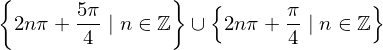

In [32]:
sy.solveset( sy.sin(2*x) - 1,x,sy.Reals)

## Expansão, simplificação e fatoração de polinômios

Vejamos exemplos de polinômios em uma variável. 

In [33]:
a0, a1, a2, a3 = sy.symbols('a0 a1 a2 a3') # coeficientes
P3x = a0 + a1*x + a2*x**2 + a3*x**3 # polinômio de 3o. grau em x
P3x

In [34]:
b0, b1, b2, b3 = sy.symbols('b0 b1 b2 b3') # coeficientes
Q3x = b0 + b1*x + b2*x**2 + b3*x**3 # polinômio de 3o. grau em x
Q3x

In [35]:
R3x = P3x*Q3x # produto polinomial
R3x

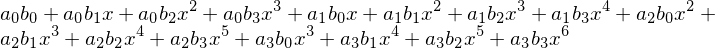

In [36]:
R3x_e = sy.expand(R3x) # expande o produto
R3x_e

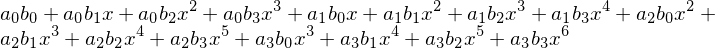

In [37]:
sy.simplify(R3x_e) # simplify às vezes não funciona como esperado

In [38]:
sy.factor(R3x_e) # 'factor' pode funcionar melhor

In [39]:
# simplify funciona para casos mais gerais 
ident_trig = sy.sin(x)**2 + sy.cos(x)**2
ident_trig

In [40]:
sy.simplify(ident_trig)

## Identidades trigonométricas 

Podemos usar `expand_trig` para expandir funções trigonométricas. 

In [41]:
sy.expand_trig( sy.sin(a + b) ) # sin(a+b)

In [42]:
sy.expand_trig( sy.cos(a + b) ) # cos(a+b)

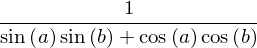

In [43]:
sy.expand_trig( sy.sec(a - b) ) # sec(a-b)

## Propriedades de logaritmo


Com `expand_log`, podemos aplicar propriedades válidas de logaritmo.

In [44]:
sy.expand_log( sy.log(a*b) )

A identidade não foi validada pois `a` e `b` são símbolos irrestritos.

In [45]:
a,b = sy.symbols('a b',positive=True) # impomos que a,b > 0

In [46]:
sy.expand_log( sy.log(a*b) ) # identidade validada

In [47]:
sy.expand_log( sy.log(a/b) )

In [48]:
m = sy.symbols('m', real = True) # impomos que m seja um no. real
sy.expand_log( sy.log(a**m) )

Com `logcombine`, compactamos as propriedades.

In [49]:
sy.logcombine( sy.log(a) + sy.log(b) ) # identidade recombinada

## Fatorial 

A função `factorial(n)` pode ser usada para calcular o fatorial de um número.

In [50]:
sy.factorial(m)

In [51]:
sy.factorial(m).subs(m,10) # 10! 

In [52]:
sy.factorial(10) # diretamente

**Exemplo:** Sejam $m,n,x$ inteiros positivos. Se $f(m) = 2m!$, $g(n) = \frac{(n + 1)!}{n^2!}$ e $h(x) = f(x)g(x)$, qual é o valor de $h(2)$?

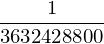

In [53]:
from sympy.abc import m,n,x

f = 2*sy.factorial(m)
g = sy.factorial(n + 1)/sy.factorial(n**2)

h = (f.subs(m,x)*g.subs(n,x)).subs(x,4)
h

## Funções anônimas 

- Função sem nome 
- São baseadas na palavra-chave `lambda`.
- Úteis para concisão de código. 

```python
lambda lista_de_parâmetros: expressão
```
Função regular:
```python
def repasse(V): 
    return 0.0103*V
```

In [37]:
repasse = lambda V: 0.0103*V # função anônima

Não necessariamente temos que atribui-la a uma variável. Neste caso, teríamos:

In [55]:
lambda V: 0.0103*V

<function __main__.<lambda>(V)>

Para usar a função, passamos um valor:

In [56]:
repasse(100000) # repasse sobre R$ 100.000,00

O modelo completo com "bonificação" seria escrito como:

In [57]:
r3 = lambda c,V,b: c*V + b # aqui há 3 parâmetros necessários

Redefinamos objetos simbólicos:

In [58]:
from sympy.abc import b,c,V
r3(b,c,V)

O resultado anterior continua sendo um objeto simbólico, mas obtido de uma maneira mais direta. 

Conclusão: usamos funções anônimas para tarefas de menor complexidade.

## "Lambdificação" simbólica

Usando `lambdify`, podemos converter uma expressão simbólica do *sympy* para uma expressão que pode ser numericamente avaliada em outra biblioteca. Essa função desempenha papel similar a uma função *lambda* (anônima).

In [43]:
expressao = sy.sin(x) + sy.sqrt(x) # expressão simbólica
f = sy.lambdify(x,expressao,"math") # lambdificação para o módulo math
f(0.2) # avalia

0.6458829262950192

Para avaliações simples como a anterior, podemos usar `evalf` e `subs`. A lambdificação será útil quando quisermos avaliar uma função em vários pontos, por exemplo. Na próxima aula, introduziremos sequencias e listas. Para mostrar um exemplo de lambdificação melhor veja o seguinte exemplo.

In [44]:
from numpy import arange # importação de função do módulo numpy
import sympy as sy
x = sy.symbols('x')
X = arange(40) # gera 40 valores de 0 a 39
print(X)
f = sy.lambdify(x,expressao,"numpy")(X) # avalia 'expressao' em X
f

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


array([0.        , 1.84147098, 2.32351099, 1.87317082, 1.2431975 ,
       1.2771437 , 2.17007424, 3.30273791, 3.81778537, 3.41211849,
       2.61825655, 2.31663458, 2.9275287 , 4.02571831, 4.73226474,
       4.52327119, 3.71209668, 3.16170813, 3.49165344, 4.50877615,
       5.38508121, 5.41923133, 4.68156445, 3.94961112, 3.99340112,
       4.86764825, 5.86157796, 6.15252835, 5.56240841, 4.72153092,
       4.48919395, 5.16372672, 6.20828093, 6.74447451, 6.36003458,
       5.48789711, 5.00822115, 5.4392244 , 6.46078258, 7.20879338])